# Molecular evolution and adaptation of SARS-CoV-2 omicron sub-lineage XBB Spike protein under African selection pressures.
_Faculty of Medicine and Health Science, University of Zimbabwe and National Pathology Research and diagnostic Centre, Midlands State Univerisity_


__Title__: Molecular evolution and adaptation of SARS-CoV-2 omicron sub-lineage XBB Spike protein under African selection pressures.


__Problem Statement__: The SARS-CoV-2 omicron variant, first detected in South Africa in November 2021, has rapidly spread to many countries and regions, posing a serious threat to global public health. The omicron variant has more than 50 mutations in its spike protein, which may affect its transmissibility, immune evasion, and vaccine efficacy. 


However, little is known about the evolution and adaptation of this variant in different geographic and epidemiological contexts. In particular, there is a lack of data and analysis on the mutations being acquired by the omicron sub-lineages circulating in Africa, where the variant originated and where there are diverse environmental and host factors that may exert different selection pressures on the virus.


__Objective:__ This research project aims to identify and characterize the mutations being acquired by SARS-CoV-2 omicron sub-lineage XBB (XBB) in Africa due to the selection pressures specific to Africa. XBB is one of the most prevalent omicron sub-lineages in Africa, accounting for more than 40% of the omicron sequences from the continent as of January 2022. This research will provide insights into the evolutionary dynamics and adaptive potential of this sub-lineage and its implications for disease transmission, severity, immunity, and intervention strategies.
Approach: The approach of this research project will consist of three main steps:


1. 	Data collection: We will collect genomic data of SARS-CoV-2 omicron sub-lineage XBB from various African countries and regions, using publicly available database GISAID. We will also collect relevant metadata such as sampling date, location, age, sex, vaccination status, clinical outcome, and co-infections.


2.	Data analysis: We will use bioinformatics tools and evolutionary biology methods to analyse the genomic data and identify the mutations being acquired by XBB in Africa. We will use statistical models to infer the possible drivers and effects of the mutations, such as environmental factors, host immunity, viral fitness, antigenicity, and drug resistance.

3. 	Data interpretation: We will interpret the results of the data analysis in light of the current scientific knowledge and literature on SARS-CoV-2 omicron variant. We will also discuss the limitations and uncertainties of our findings and suggest directions for future research. We will disseminate our results through peer-reviewed publications, conference presentations, and online platforms.


__Work-plan:__ The expected duration of this research project is 1 month. The tentative work-plan is as follows:

•	Week 1: Data collection and Data cleaning
•	Week 2: Data analysis
•	Week 3: Data interpretation
•	Week 4: Preparing the manuscript for publication


__Expected Outcomes:__ The expected outcomes of this research project are:
•	A comprehensive dataset of SARS-CoV-2 omicron sub-lineage XBB genomic sequences and metadata from Africa
•	A detailed characterization of the mutations being acquired by XBB in Africa due to the selection pressures specific in Africa.




## 1. Sequence downloads

GISAID was used to download SARS-CoV-2 whole genome sequences. Filters used for the download was Africa [location] and XBB [lineage]. All lineages in the XBB for each African country were downloaded as:


1. FASTA sequences


2. Available patient status.


45 files for fasta sequences and 45 files of patient stati were downloaded. Merging of the data was done manually and a single file of 3 106 fasta whole genome sequences and single file of ___ patient stati were compiled.


Because this study is focussing on the Spike protein mutation, the next step was to extract the appropriate spike region from the whole genome sequence.

## 2. Loading nucleotide sequences and extracting approximate spike gene from each sequence

A number of Python libraries were used to load, manipulate and visualise data in this project:

1. `pandas` were used to load .csv files into DataFrames/Tables


2. `Biopython` is the heart of interacting with all biological data using python language 


3. `Counter` from `collections` in-built Python library, useful in counting entities when needed in the project.


4. `matplotlib` and `seaborn` for visualising data into plots or graphs.


The locus of the `spike gene` in the whole genome sequences of SARS-CoV-2 is from nucleotide position number `21 563` upto `25 384`, however because the whole-genome sequences had different lengths, the range used in this project is an approximation to accomodate all these tappering ends was from nucleotide position `21 500` to `25 500`.

In [2]:
# Python packages to be used in the project

# For loading .csv files as DatFrames/Tables
import pandas as pd 

#Biopython - package to interact with biological data in Python language
import Bio 

from collections import Counter  # in-built python collections

# For Data Visualisation/Graphs/Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from Bio import SeqIO   # Class for Sequence input or output

omicron_xbb = SeqIO.parse('African omicronXBB.fasta','fasta')  #loading sequences from .fasta file containing African omicron XBB nucleotide info

for seq_record in omicron_xbb:
    print(seq_record.id)
    print(repr(seq_record.seq))

# to check if sequences were successfully loaded, cell output collapsed in accordance of GISAID T&Cs


In [4]:
african_omicron_xbb_spike= []
# list to hold all spike genes extracted from whole genome sequences

for seq_record in SeqIO.parse('African omicronXBB.fasta','fasta'):
    spike_gene = seq_record[21500:25499]    #approximate locus for spike gene in SARS-CoV-2 whole genome

    # appening all extracted spike genes into list
    african_omicron_xbb_spike.append(spike_gene)
    

# SeqIO.write(african_omicron_xbb_spike,'african_omicron_xbb_spike.fasta','fasta')
# SeqIO.write deactivated to minimise rewriting the file everytime code in this cell is executed

## 3. Data Cleaning and Sequence Alignment

1 rule to them all in Data Analysis is `Less Is More, as long the data is well-curated', especially when there is a limitation in computational resources.

Duplicate sequences and sequences containing 'unidentified' nucleotide bases (represented by `N`) > 4 were removed from the dataset for 2 reasons (code in following cells):

1. To remove noise in the downstream analysis that might have an effect on the obtained results.


2. To decrease number of sequences and file size which can be below the limit of free online webservers as it is a bit difficult to hire computational resources required for large alignments.

Alignment was done using `Clustal O` hosted on the European Bioinformatics Institute (EBI) webserver. Parameters used are:

1. guidetreeout: true


2. dismatout: false


3. dealign: false


4. mbed: true


5. mbediteration: true


6. iterations: 0


7. gtiterations: -1


8. hmmiterations: -1


9. outfmt: fa


10. order: aligned


11. stype: dna

### Cleaning sequences

Sequences with more than 4 unidentified nucleotide bases ('N') were removed from the dataset followed by Alignment using `Clustal O` hosted on the EBI webservers. Total number of clean spike sequences was down to 984.

In [6]:
from Bio import SeqIO

spike_sequences = SeqIO.parse('non-redundant spike sequences.fasta','fasta')

clean_sequences = []

for record in spike_sequences:
    if str(record.seq).count('N') < 4:           # removes sequences with unidentified sequences more than 4 nucleotide bases
        if record.seq not in clean_sequences:    # removes repeated nucleotide sequences
            clean_sequences.append(record)

# SeqIO.write(clean_sequences,'cleaned spike.fasta','fasta')     #writes the sequences into a fasta file

## 4. Pervasive Selection Analysis

The alignments were edited with `MEGA X` software, using the reference spike gene sequence from GISAID database to determine the accurate location of each spike gene within the approximate gene region.

`MEGA X` was also used to generate a Phylogenetic tree from the aligned sequences using Maximum Likelihood method and bootstrap number = 100. THe phylogenetic tree experted in `newick` format was generated for two purposes:


 1. To understand the relationship between sequences and how related they are, interactive tree of life (`iToL`) was used to generate an unrooted Phylogenetic tree (shown below).

 <img src = 'Phylogenetic tree.png'>


 2. For sequences above 500, Fast Uncostrained Bayesian AppRoximation (`FUBAR`) to be used in the next steps for Selection analysis requires a guide tree to be integrated together with sequence data.


> `NCBI G-Workbench` was used to integrate the guide tree into the spike sequence file.


>`FUBAR` pervasive selection analysis tool hosted on the `Datamonkey` webserver was used to investigate sites undergoing both positive and negative pervasive selection. Parameters for `FUBAR` analysis were:


 > 1. Number of grid points = 20


 > 2. Concentration parameter of the Dirichlet prior = 0.5

 >`FUBAR` results were exported in two forms:
 >1. Posterior rate distribution exported as an image:
 
<p style="text-align: center;">
  <img src="posterior rate distribution.png" alt="centered image" />
</p>


>2. Table of selection results exported for each site in .csv format shown in the next code cell:

In [8]:
fubar_selection_table = pd.read_csv('fubar-site table.csv')
fubar_selection_table

,Site,Partition,alpha,beta,beta-alpha,Prob[alpha>beta],Prob[alpha<beta],BayesFactor[alpha<beta]
0,1,1,1.783,0.499,-1.284,0.592,0.350,0.778
1,2,1,1.000,0.530,-0.469,0.559,0.380,0.887
2,3,1,0.917,0.542,-0.375,0.551,0.388,0.914
3,4,1,1.000,0.530,-0.469,0.559,0.380,0.887
4,5,1,1.281,15.619,14.338,0.009,0.971,48.875
...,...,...,...,...,...,...,...,...
1268,1269,1,1.366,0.545,-0.822,0.570,0.371,0.851
1269,1270,1,0.900,0.571,-0.329,0.545,0.394,0.940
1270,1271,1,0.997,0.499,-0.498,0.567,0.372,0.855
1271,1272,1,0.710,0.558,-0.151,0.527,0.410,1.004


### Number of sites undergoing pervasive positive selection

All sites showing a positive value for `beta - alpha` were recorded as positive sites to understand number of sites undergoing positive selection.

`alpha` = synonymous substitution rate  (where a change in a base does not change the final amino acid)


`beta` = non-synonymous substitution rate (where a change in a base changes the final amino acid)

So 127 sites undergoing more non - synonymous substitution rate than synonymous substitution rates are undergoing positive selection.

In [10]:
positive_sites = []

for idx,val in enumerate(fubar_selection_table['beta-alpha']):
    if val > 0:
        positive_sites.append(idx)

    else:
        pass

positive_sites_number = str(len(positive_sites))

print(f'{positive_sites_number} sites show pervasive positive selection')

127 sites show pervasive positive selection


### Sites undergoing __strong__ positive selection

The Bayes Factor (BF) from FUBAR results was used to test the hypothesis of pervasive positive selection (β > α) at each site. A higher BF indicates a stronger support for positive selection. Several sites exhibited high BF values, as shown by the peaks in the bar plot below:

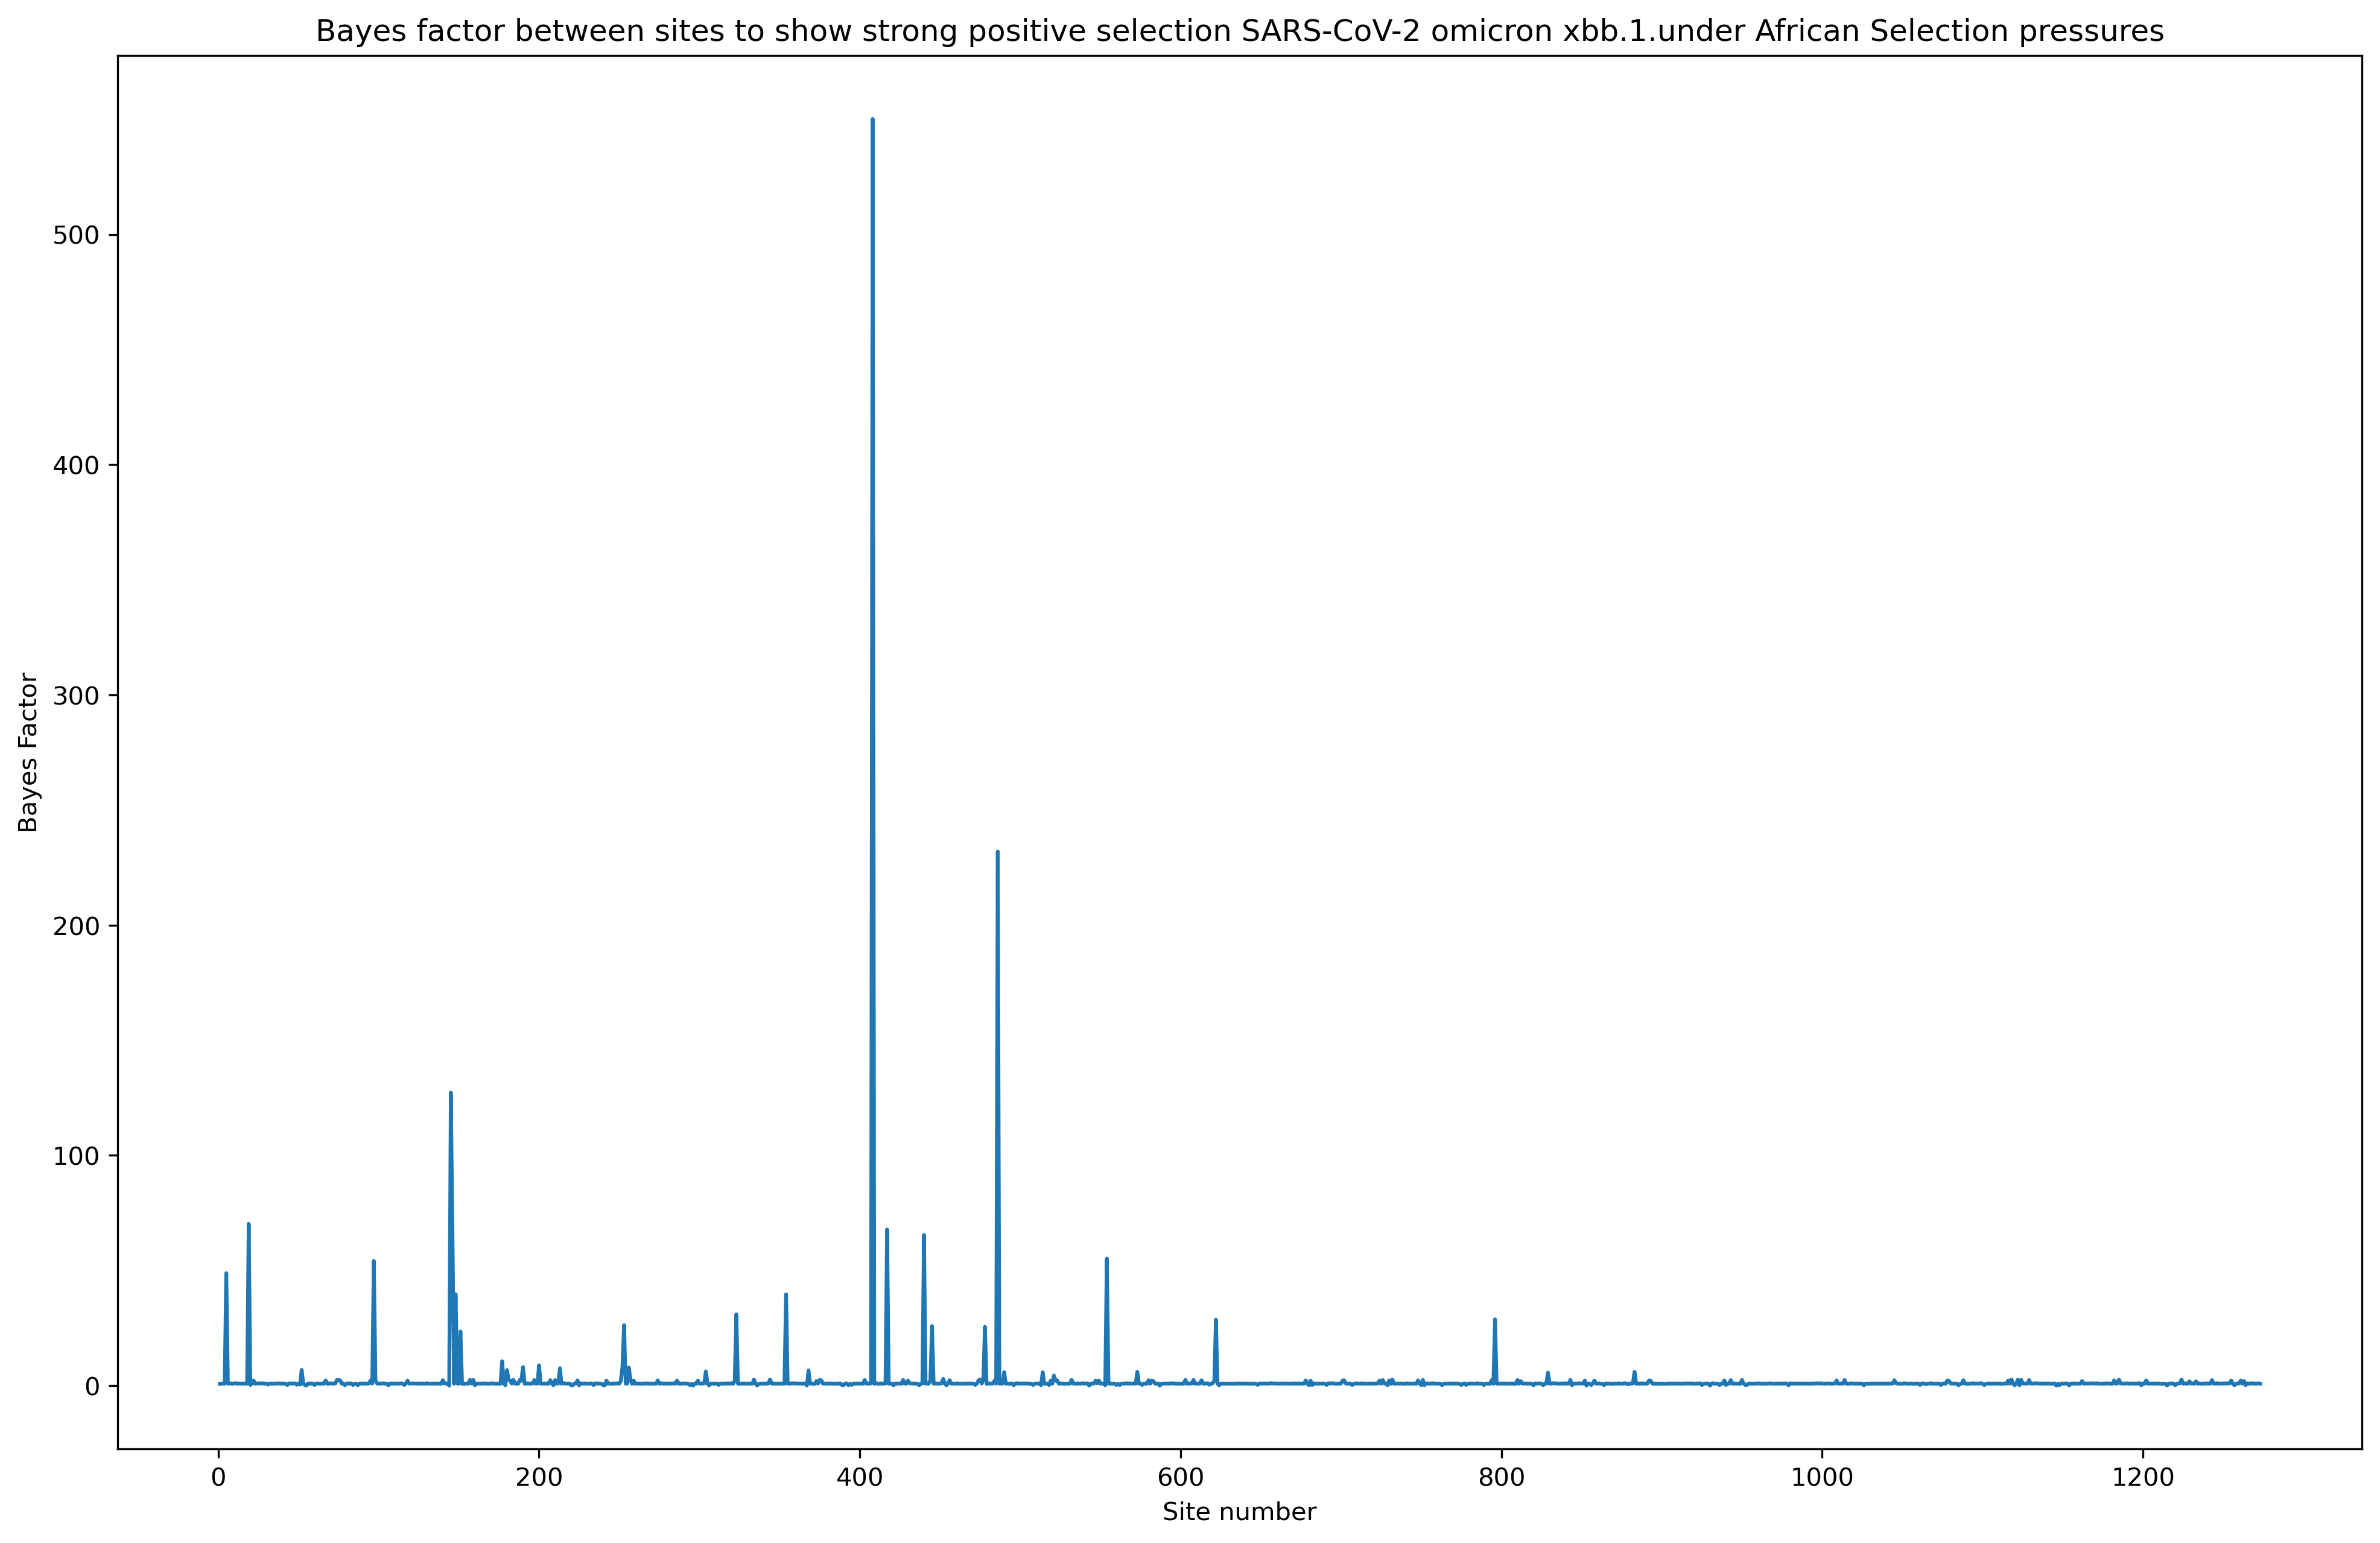

In [12]:
site = fubar_selection_table['Site']
bayes_factor = fubar_selection_table['BayesFactor[alpha<beta]']
# colors = ('blue', 'green', 'red', 'black')
# sns.set()

plt.figure(figsize=(16,10), dpi =300)
ax=plt.axes()
ax.plot(site, bayes_factor)
plt.xlabel('Site number')
plt.ylabel('Bayes Factor')
plt.title('Bayes factor between sites to show strong positive selection SARS-CoV-2 omicron xbb.1.under African Selection pressures')
plt.show();

Sites under pervasive positive or negative selection were identified by applying a posterior probability cutoff of 0.95 for β/α > 1 or β/α < 1, respectively, using FUBAR.

In [13]:
strong_beta = fubar_selection_table['Prob[alpha<beta]']
strong_alpha = fubar_selection_table['Prob[alpha>beta]']

strong_positive_selection = fubar_selection_table.loc[strong_beta > 0.95]
strong_negative_selection = fubar_selection_table.loc[strong_alpha > 0.95]

strong_selection_dfs = [strong_negative_selection,strong_positive_selection]
strong_selection_sites = pd.concat(strong_selection_dfs)
strong_selection_sites

,Site,Partition,alpha,beta,beta-alpha,Prob[alpha>beta],Prob[alpha<beta],BayesFactor[alpha<beta]
54,55,1,7.740,0.558,-7.182,0.951,0.033,0.050
143,144,1,14.634,0.708,-13.926,0.989,0.004,0.005
295,296,1,9.751,0.562,-9.190,0.987,0.006,0.009
542,543,1,7.658,0.557,-7.101,0.951,0.034,0.050
586,587,1,20.099,0.676,-19.424,0.983,0.011,0.015
852,853,1,33.106,2.820,-30.286,0.971,0.010,0.015
929,930,1,17.570,0.598,-16.971,0.981,0.012,0.018
1145,1146,1,21.427,0.706,-20.721,0.984,0.010,0.014
4,5,1,1.281,15.619,14.338,0.009,0.971,48.875
18,19,1,1.869,30.760,28.891,0.006,0.980,70.259


## 5. Recombination Analysis
To detect recombination events among SARS-CoV-2 S sequences, we applied the SISCAN method implemented in the recombination detection programme (RDP). This method requires a minimum of three or four sequences for each analysis: a parental sequence, a potential recombinant sequence and an outlier sequence. 


The following sequences were used for our analysis: 

1. a parental sequence from a [Southern African omicron study](https://www.nature.com/articles/s41586-022-04411-y) 


2. a potential recombinant sequence derived from a consensus of African S sequences


3. an outlier sequence from a GISAID S wild type sequence

In [28]:
siscan_results = pd.read_csv('Recombination Siscan plot data.csv')
siscan_results

,Position in alignment,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P15,S1,S2,S3,S4,S5,S6,S7,S8,S9
0,1,0,0.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,0
1,1,0,0.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,0
2,101,0,0.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,0
3,101,0,0.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,0
4,121,0,0.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,3661,0,0.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,0
360,3681,0,0.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,0
361,3681,0,0.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,0
362,3701,0,0.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.0,0,0


Column titles above represent the following:

1. Position in alignment: The position of the nucleotide in the aligned sequences.


2. P1 to P15: The parental sequences used for the siscan analysis. Each column shows the Z-score of the phylogenetic signal for that sequence at each position.


3. S1 to S9: The potential recombinant sequences used for the siscan analysis. Each column shows the Z-score of the phylogenetic signal for that sequence at each position.


The siscan method of RDP is one of the methods for detecting recombination in a set of aligned nucleotide or amino acid sequences. It is a Monte Carlo procedure that measures variations in phylogenetic signals in gene sequences that result from recombination. 


The siscan method works by scanning a window of fixed size along the alignment and calculating the Z-score of the phylogenetic signal for each sequence at each position. The Z-score is a measure of how many standard deviations a value is away from the mean. A high Z-score indicates a strong phylogenetic signal, while a low Z-score indicates a weak or contradictory phylogenetic signal. The siscan method then compares the Z-scores of the potential recombinant sequence with those of the parental and outlier sequences to identify regions where the phylogenetic signal is inconsistent with the expected topology.


The siscan method can detect both inter- and intra-species recombination events, as well as recombination events involving multiple breakpoints. It can also distinguish between misleading signals caused by compositional similarities and true signals caused by recombination. However, the siscan method may have some limitations, such as being sensitive to window size, alignment quality and sequence divergence.

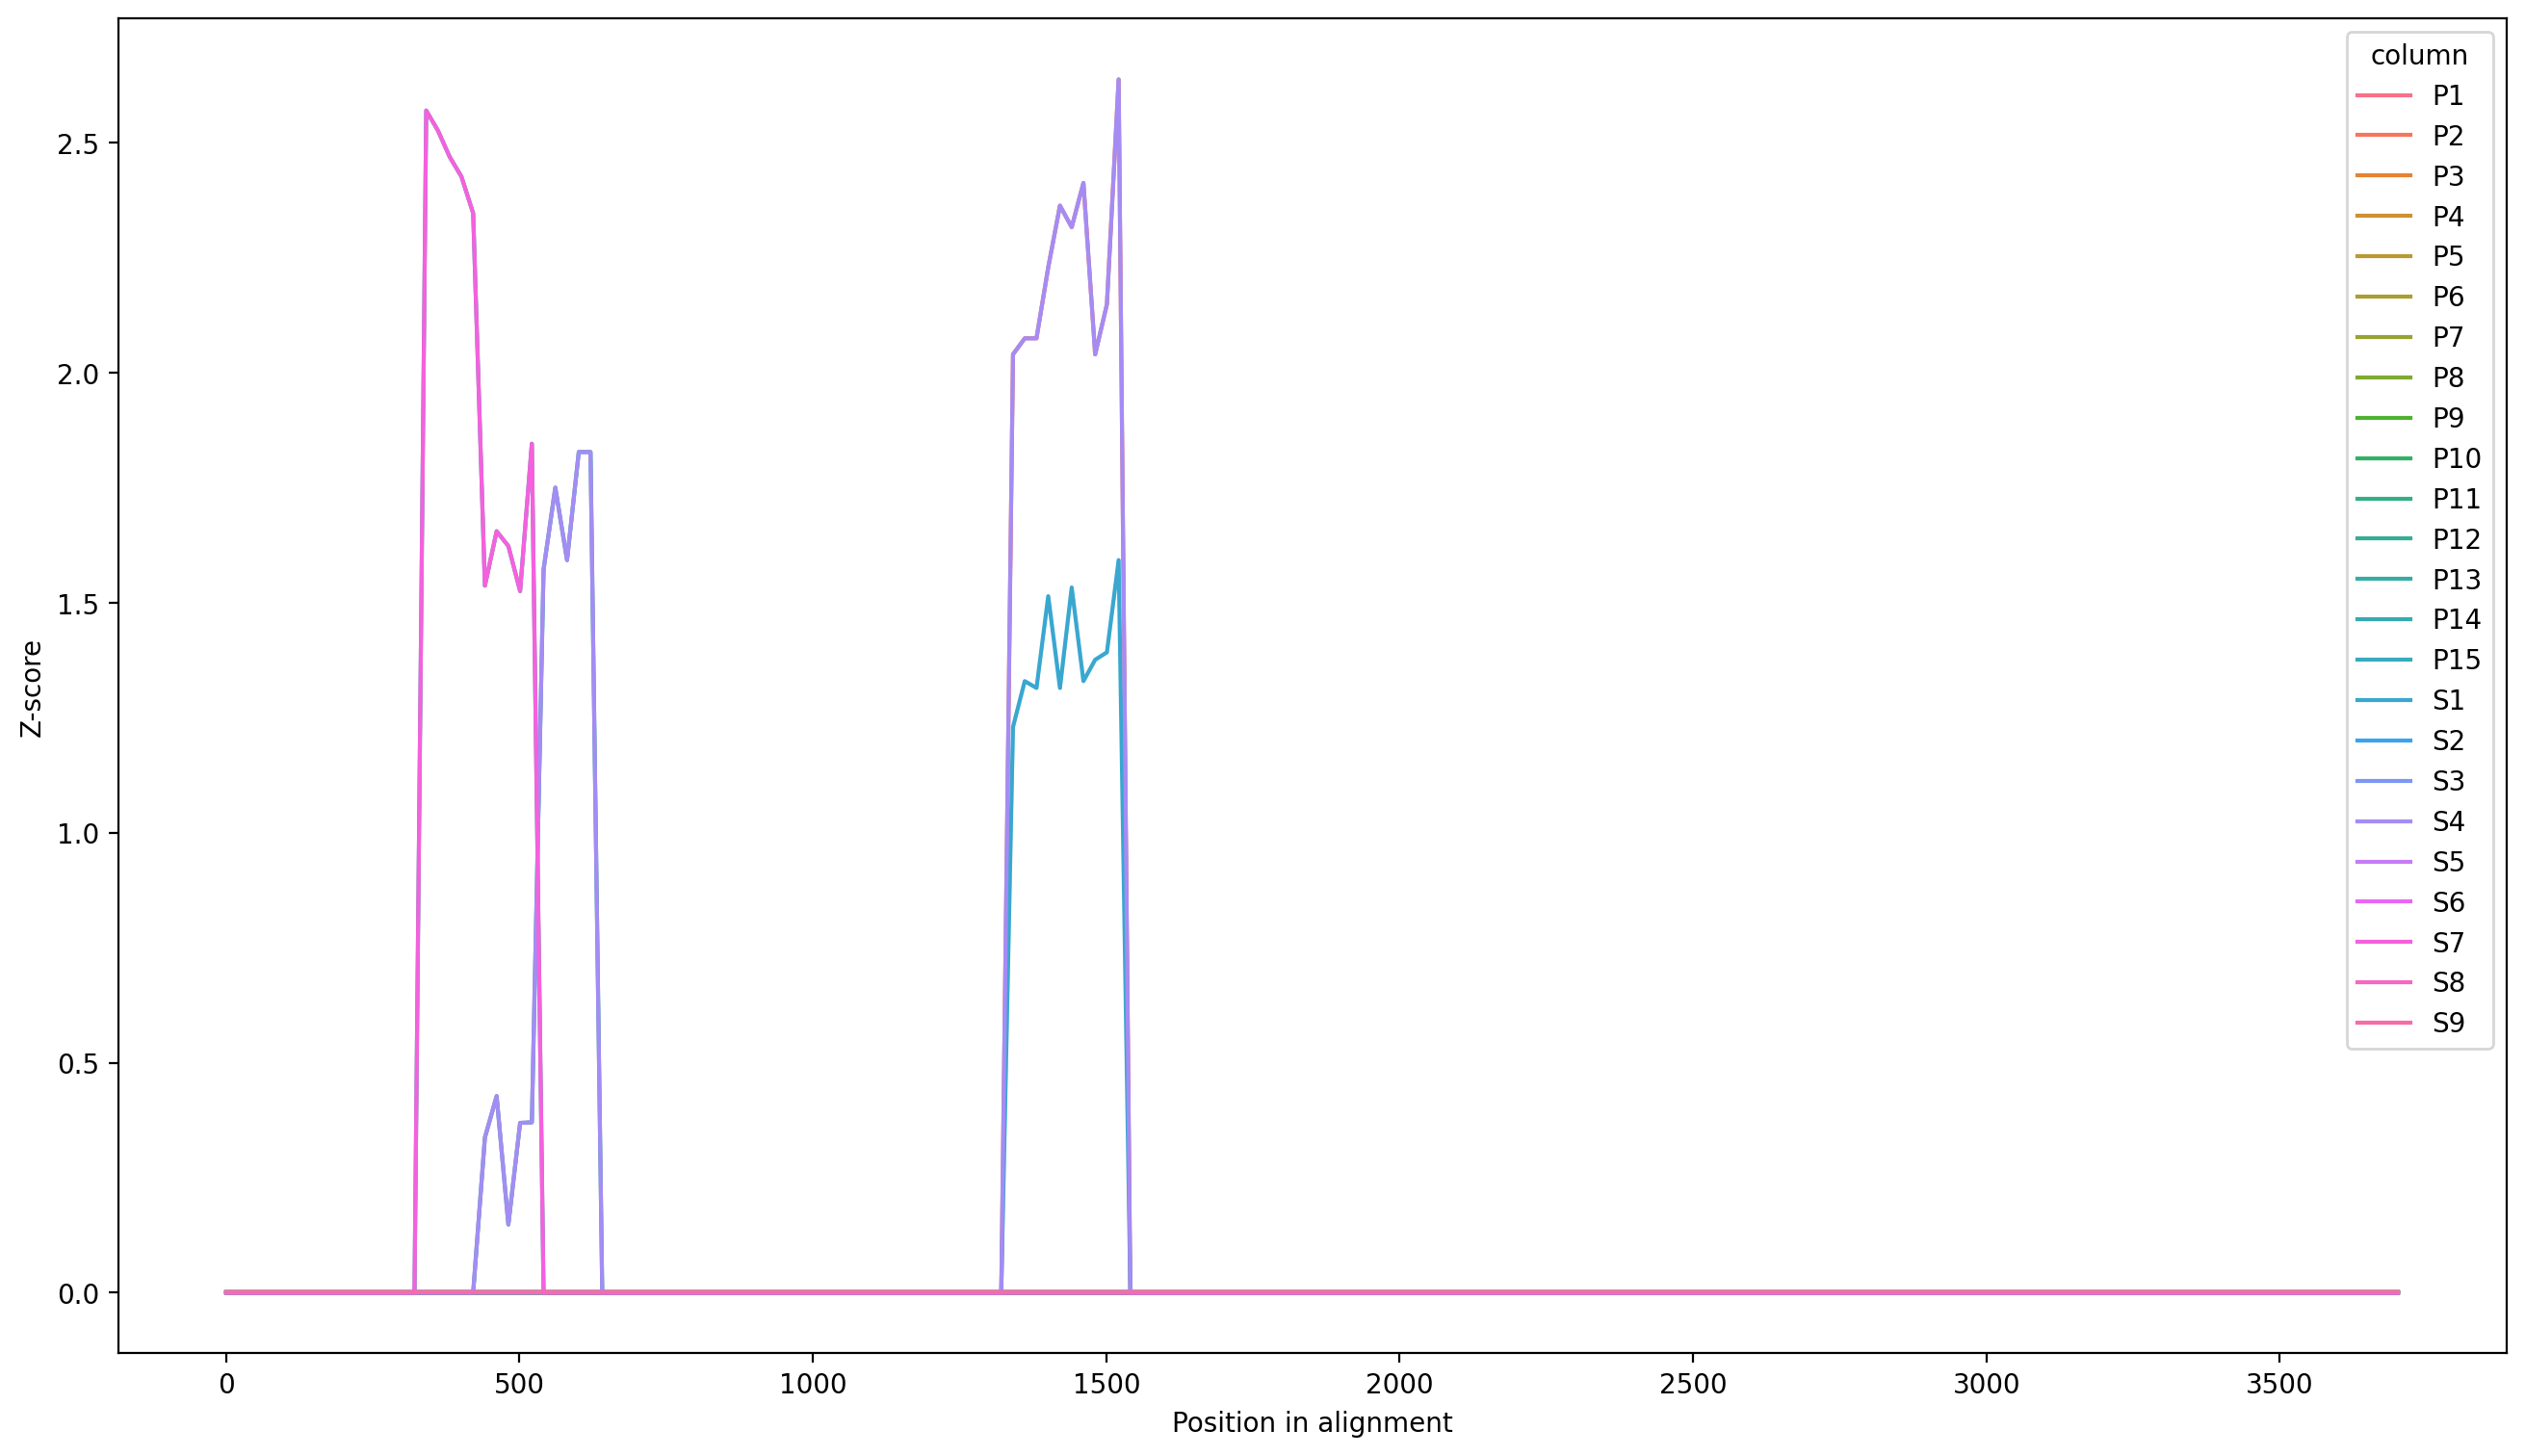

In [29]:
# Loading the dataset
data = siscan_results

# Setting the x and y columns
x_col = 'Position in alignment'
y_cols = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','S1','S2','S3','S4','S5','S6','S7','S8','S9']

# Reshaping the data from wide to long format
data_long = pd.melt(data, id_vars=x_col, value_vars=y_cols, var_name='column', value_name='Z-score')

# Resolution for the plot

plt.figure(figsize=(16,9), dpi=200)

# Plotting the line plots with hue (different colours)
sns.lineplot(data=data_long, x=x_col, y='Z-score', hue='column')

# Show the plot
plt.show()


What the code above is doing:

1. The first three lines import the libraries that are needed for the analysis: seaborn for plotting, matplotlib for visualization and pandas for data manipulation.


2. The next line loads the dataset into a variable called data. The dataset is assumed to be a pandas DataFrame with columns named as x_col and y_cols.


3. The next two lines set the x and y columns as variables. The x column is a single column name that represents the position in alignment, and the y columns are a list of column names that represent the values of P1 to P15 and S1 to S9.


4. The next line uses the pd.melt function to reshape the data from wide to long format. This means that each row in the original data will be split into multiple rows, one for each y column. The pd.melt function takes four arguments: the data to be reshaped, the id_vars that specify the columns to keep as they are, the value_vars that specify the columns to be melted into one column, and the var_name and value_name that specify the names of the new columns that will be created. The result is a new DataFrame called data_long that has four columns: Position in alignment, column, value and index.


5. The next line uses the sns.lineplot function to plot the line plots with hue. This means that each line will have a different color based on the value of the column variable. The sns.lineplot function takes four arguments: the data to be plotted, the x and y variables that specify the columns to use for the x and y axes, and the hue variable that specifies the column to use for coloring the lines. The result is a line plot that shows how the value changes with position in alignment for each column.


6. The last line uses the plt.show function to display the plot on the screen.

### Analysis of Recombination results

The SISCAN method was used to detect recombination signals in the spike gene sequences of the African Omicron xbb variant and its possible parental sequences. The Z-score plot below shows the strength of the phylogenetic signal for each sequence at each position. 


The purple line represents the African Omicron xbb sequence, which is the putative recombinant. 


The pink line represents the GISAID S gene reference sequence, which is the major parent showing recombinant signals around nucleotide number 400-600 (amino acid number ~ 133 - 200 of the spike protein) which is in the N-terminal domain. 


The green line represents the Southern Africa Omicron S sequence, which is the minor parent, in the region ~ nt 1350 - 1550 (~ amino acid numbers = 450 - 500) which is in the receptor binding domain. 


The NTD is mostly involved antibody escape and RBD region is involved in viral attachment and entry.

## 6. 3D protein structure alignment and analysis

`Jalview 2.11` was used to translate the nucleotide alignment of the spike gene sequences from different SARS-CoV-2 variants into amino acid sequences and to infer the consensus sequence for each variant. The consensus sequence of the African Omicron xbb variant was then submitted to the `PHYRE 2.0` webserver for protein structure prediction, using the crystal structure of the Omicron spike protein (`pdb id = 7T9K`) as a template. This resulted in a high-confidence 3D model of the African Omicron xbb spike protein with 100% accuracy.

To compare the structural features of the African Omicron xbb spike protein with those of the ancestral SARS-CoV-2 spike protein, structural alignment was performed using the crystal structure of the wild type SARS-CoV-2 S protein (`pdb id = 6VXX`) as a reference. 

The image below shows the superimposed structures of the two proteins, with the wild type S protein in blue and the African Omicron xbb S protein in pink ribbons. We observed that the African Omicron xbb S protein has a smaller size than the wild type S protein, which may affect its interactions with host receptors and antibodies. This could be one of the factors contributing to the increased transmissibility and immune evasion of the Omicron variant.

The image is showing how the two Spike proteins aligned in 3 different side views, top views and bottom view.

<img src = 'Superimposed Spike protein.png'>